# FP-Growth Algorithm (Frequent Pattern Growth)

- The FP-Growth algorithm is a popular method in Association Rule Learning for mining frequent itemsets without generating a large number of candidate sets (unlike Apriori).

It is considered faster and more efficient than Apriori because:
- It compresses the dataset into a compact data structure (FP-Tree).
- It avoids repeated scanning of the dataset.

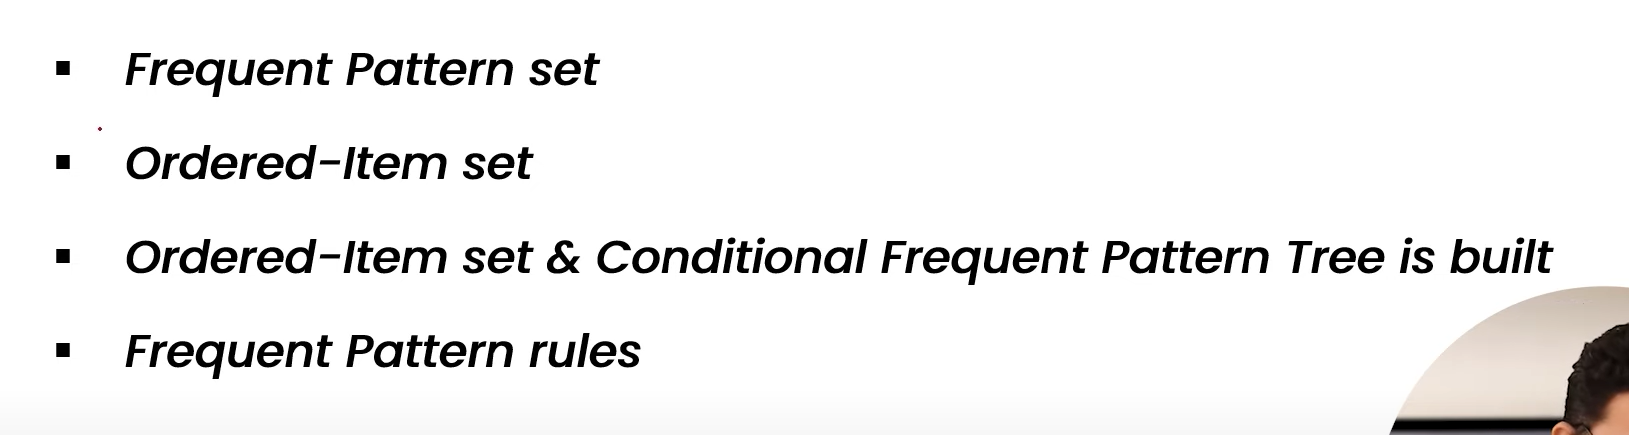

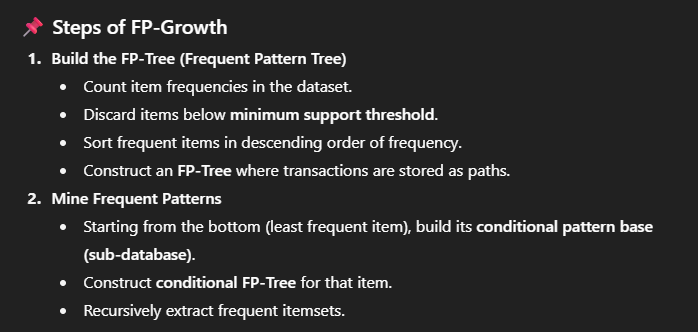

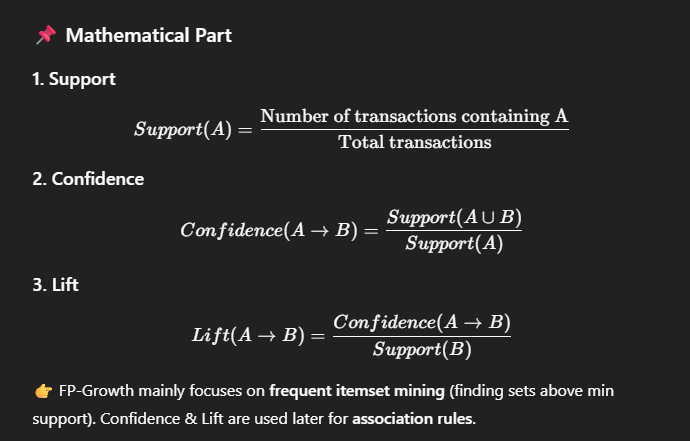

### Working Example
##### Dataset

| Transaction ID | Items Bought                |
| -------------- | --------------------------- |
| T1             | {Bread, Milk}               |
| T2             | {Bread, Diaper, Beer, Eggs} |
| T3             | {Milk, Diaper, Beer, Cola}  |
| T4             | {Bread, Milk, Diaper, Beer} |
| T5             | {Bread, Milk, Diaper, Cola} |

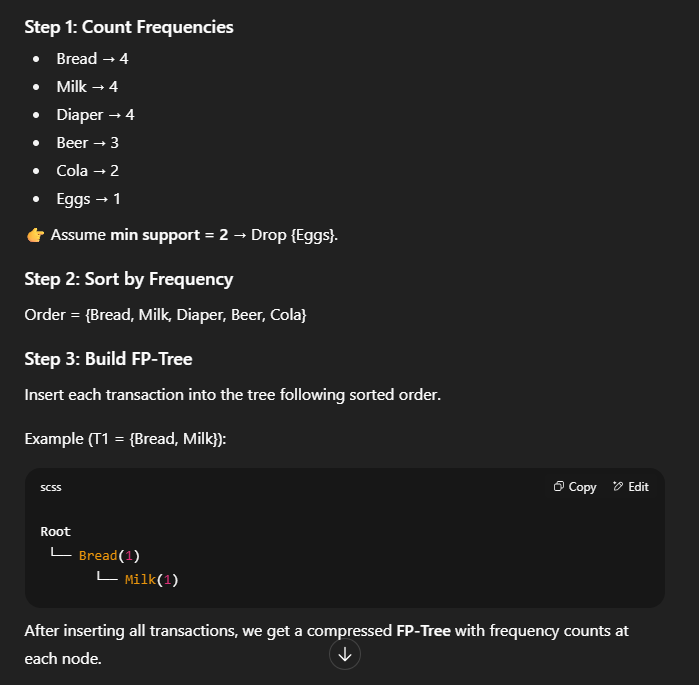
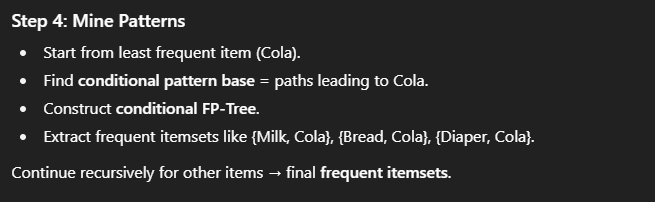

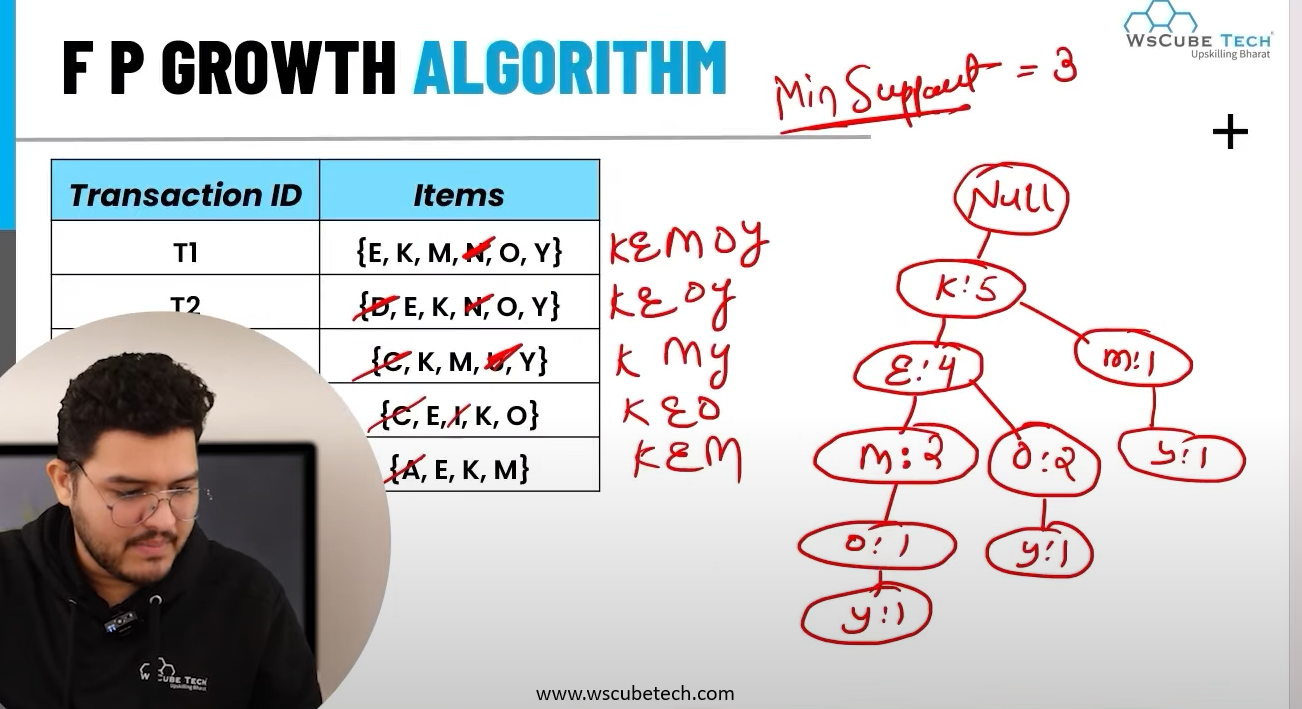
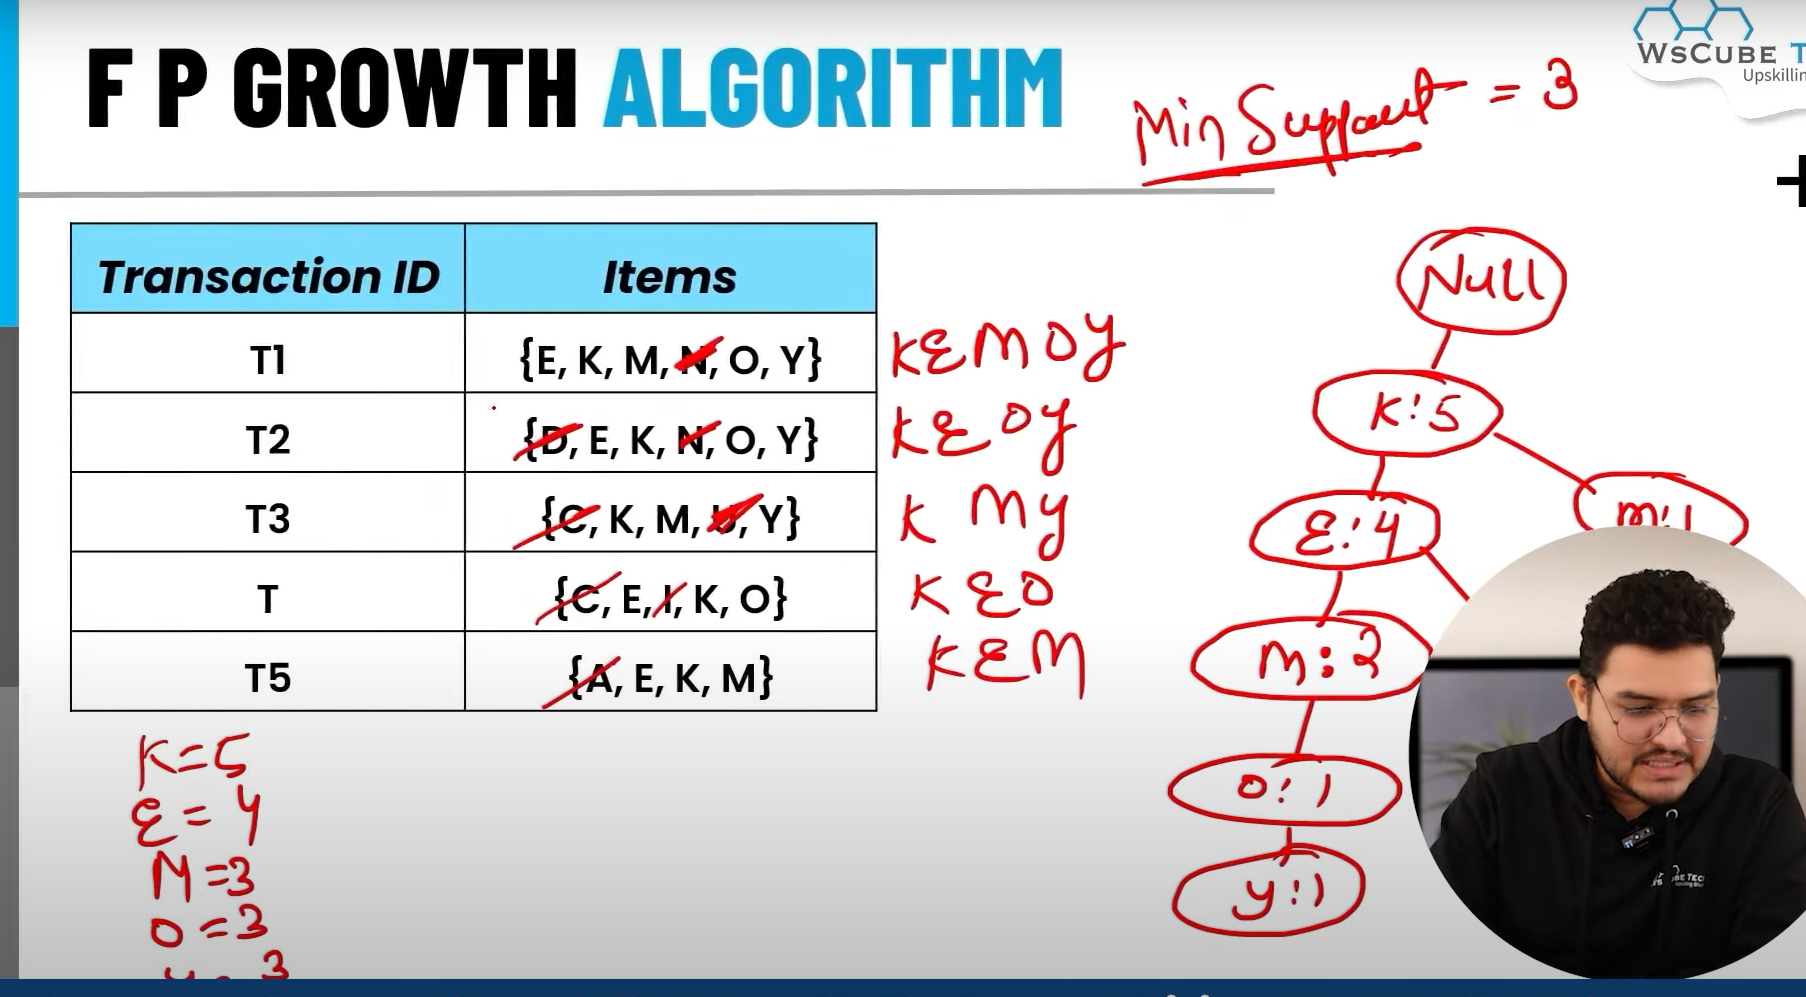

---

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
ds = pd.read_csv('modified_file.csv')
ds.head()

,id,item 1,item 2,item 3,item 4,item 5,item 6,item 7,item 8,item 9,item 10,item 11,item 12,item 13,item 14,item 15,item 16,item 17
0,0,NaN,Bread,NaN,NaN,Corn,Dill,NaN,Ice cream,NaN,NaN,NaN,NaN,Sugar,NaN,Yogurt,chocolate,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Apple,NaN,Butter,NaN,NaN,Dill,NaN,Ice cream,NaN,Milk,NaN,NaN,NaN,NaN,Yogurt,chocolate,NaN
3,3,NaN,NaN,Butter,Cheese,NaN,Dill,NaN,NaN,NaN,Milk,Nutmeg,Onion,NaN,NaN,NaN,NaN,NaN
4,4,Apple,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
market = []
for i in range(0, ds.shape[0]):
    cus = []
    for j in ds.columns:
        if type(ds[j][i]) == str:
            cus.append(ds[j][i])
    market.append(cus)

In [5]:
market

[['Bread', 'Corn', 'Dill', 'Ice cream', 'Sugar', 'Yogurt', 'chocolate'],
 ['Milk'],
 ['Apple', 'Butter', 'Dill', 'Ice cream', 'Milk', 'Yogurt', 'chocolate'],
 ['Butter', 'Cheese', 'Dill', 'Milk', 'Nutmeg', 'Onion'],
 ['Apple', 'Bread'],
 ['Apple',
  'Bread',
  'Butter',
  'Cheese',
  'Dill',
  'Ice cream',
  'Nutmeg',
  'Unicorn',
  'Yogurt',
  'chocolate'],
 ['Butter',
  'Eggs',
  'Ice cream',
  'Kidney Beans',
  'Milk',
  'Nutmeg',
  'Onion',
  'Yogurt'],
 ['Apple', 'Cheese', 'Eggs', 'Nutmeg', 'Sugar', 'Yogurt'],
 ['Apple',
  'Corn',
  'Dill',
  'Eggs',
  'Ice cream',
  'Milk',
  'Nutmeg',
  'Onion',
  'Sugar',
  'Unicorn',
  'Yogurt',
  'chocolate'],
 ['Apple',
  'Dill',
  'Eggs',
  'Ice cream',
  'Milk',
  'Onion',
  'Sugar',
  'Unicorn',
  'chocolate'],
 ['Apple', 'Bread', 'Cheese', 'Ice cream', 'Sugar', 'Unicorn'],
 ['Apple',
  'Bread',
  'Cheese',
  'Dill',
  'Eggs',
  'Ice cream',
  'Kidney Beans',
  'Nutmeg',
  'Sugar',
  'Yogurt',
  'chocolate'],
 ['Onion', 'Unicorn', 'chocol

In [6]:
l = []
for i in market:
    for j in i:
        l.append(j)

In [7]:
import collections
p = collections.Counter(l)

In [8]:
d = {'Item Name': p.keys(), "values":p.values()}

In [9]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [10]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [11]:
df = pd.DataFrame(tr.transform(market), columns= tr.columns_)

In [12]:
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [13]:
from mlxtend.frequent_patterns import fpgrowth

In [15]:
fpgrowth(df, min_support= 0.07, use_colnames= True, max_len= 3).sort_values(by= ['support'])

,support,itemsets
646,0.070070,"(Ice cream, Eggs, Dill)"
548,0.070070,"(Dill, Unicorn, Nutmeg)"
295,0.070070,"(Bread, Apple, Dill)"
203,0.070070,"(Kidney Beans, Bread, Eggs)"
358,0.071071,"(Kidney Beans, Apple, Onion)"
...,...,...
3,0.409409,(Sugar)
2,0.410410,(Ice cream)
1,0.420420,(Yogurt)
8,0.420420,(Butter)
